In [14]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
encoded_ecgs = torch.load('encoded_pretrained/ecg_encoded.pth')

In [4]:
len(encoded_ecgs)

108

In [7]:
encoded_mris = torch.load('encoded_pretrained/mri_encoded.pth')

In [8]:
len(encoded_mris)

108

### Plot ECG-MRI pretrained encoded T-SNE

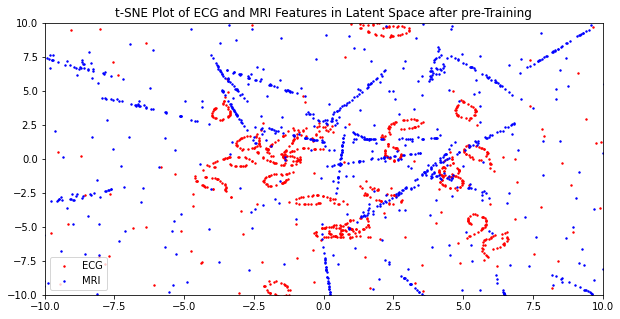

In [18]:
ecg_results = []
mri_results = []

for ecg, mri in zip(encoded_ecgs, encoded_mris):
    mri = mri.squeeze().squeeze()

    # Convert the lists of tensors into NumPy arrays
    ecg = np.array(ecg.cpu().detach().numpy())
    mri = np.array(mri.cpu().detach().numpy())

    combined_features = np.concatenate((ecg, mri), axis=0)

    # Perform t-SNE on the combined features
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(combined_features)

    # Separate the t-SNE results for ecgs and mris
    ecg_tsne = tsne_results[:len(ecg)]
    mri_tsne = tsne_results[len(ecg):]

    ecg_results.append(ecg_tsne)
    mri_results.append(mri_tsne)

# Concatenate the results
ecg_results = np.concatenate(ecg_results, axis=0)
mri_results = np.concatenate(mri_results, axis=0)

# Plot the t-SNE results
plt.figure(figsize=(10, 5))
plt.scatter(ecg_results[:, 0], ecg_results[:, 1], color='red', label='ECG', s=2)
plt.scatter(mri_results[:, 0], mri_results[:, 1], color='blue', label='MRI', s=2)
plt.title('t-SNE Plot of ECG and MRI Features in Latent Space after pre-Training')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.legend()

plt.show()